<left><img width=25% src="../source/logo.png"></left>

### Applied Machine Learning

## Mehmet Can Yavuz, PhD

Adapted from Volodymyr Kuleshov, Cornell Tech

# Lecture 8: Unsupervised Learning and $K$-means

# Announcements

1. Quiz for the first 4 weeks' content out and due Oct 3
    + Does not count towards your grade
2. Homework 2 is out and due Oct 17

# Part 1: What is Unsupervised Learning?

We will start with a high-level overview of unsupervised learning, and will introduce a dataset and an algorithm.

# Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:

* __Clusters of related datapoints__. For example, we might want to discover groups of similar customers from the logs of an e-commerce website.
* __Embeddings and latent spaces__. Transform the data into another space for 1) visualization, or 2) better features
* __Outliers__, i.e., particularly unusual or interesting datapoints. For example, suspicious financial transactions.
* __Denoised signals__. Recovering an image corrupted with white noise.
* __Generation__. Unconditionally create new samples, e.g., images

# Components of Unsupervised Learning

In unsupervised learning, we also define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Unsupervised Model} $$

The unsupervised model describes interesting structure in the data. For instance, it can identify interesting hidden clusters.

# An Unsupervised Learning Dataset

As a first example of an unsupervised learning dataset, we will use our Iris flower example, but we will discard the labels.

We start by loading this dataset.

In [1]:
import numpy as np; np.set_printoptions(precision=2)
import pandas as pd; pd.options.display.float_format = "{:,.2f}".format
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can visualize this dataset in 2D. Note that we are no longer using label information.

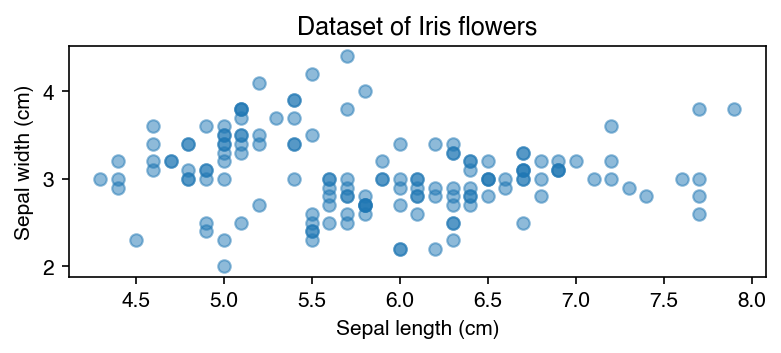

In [2]:
from matplotlib import pyplot as plt
plt.rcParams.update({ "figure.figsize": [6, 2], "figure.dpi": 150, "text.usetex": False, "font.family": "Helvetica"})

# Visualize the Iris flower dataset
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.ylabel("Sepal width (cm)"); plt.xlabel("Sepal length (cm)"); plt.title("Dataset of Iris flowers");

# An Unsupervised Learning Algorithm

We'll input this dataset into a popular unsupervised learning algorithm, __$K$-means__.

* The algorithm seeks to find $K$ hidden clusters in the data.
<!-- * Each cluster is characterized by its centroid (its mean). -->
* The clusters reveal interesting structure in the data.

Running $K$-means on this dataset identifies three clusters.

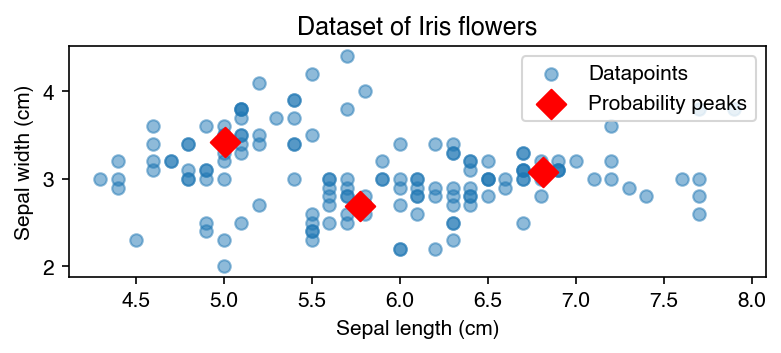

In [3]:
# fit K-Means with K=3
from sklearn import cluster
model = cluster.KMeans(n_clusters=3, n_init='auto')
model.fit(iris.data[:,[0,1]])

# display the clusters
plt.scatter(iris.data[:,0], iris.data[:,1], alpha=0.5)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)"); plt.xlabel("Sepal length (cm)"); plt.title("Dataset of Iris flowers")
plt.legend(['Datapoints', 'Probability peaks']);

These clusters correspond to the three types of flowers found in the dataset, which we obtain from the labels.

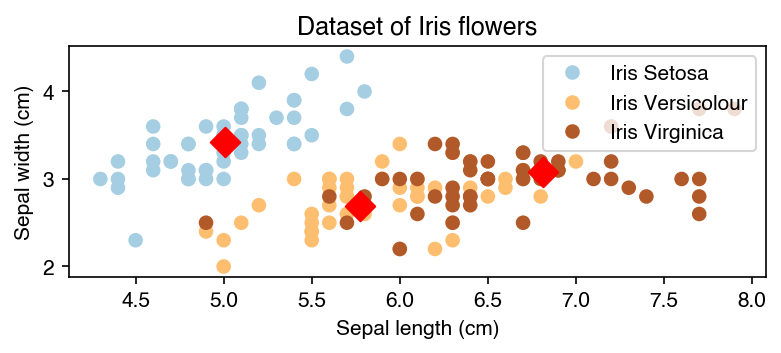

In [4]:
p1 = plt.scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
plt.ylabel("Sepal width (cm)"); plt.xlabel("Sepal length (cm)"); plt.title("Dataset of Iris flowers")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']);

# Applications of Unsupervised Learning

Unsupervised learning has numerous applications:

1. **Visualization:** identifying and making accessible useful hidden structure in the data.
2. **Anomaly detection:** identifying factory components that are likely to break soon.
3. **Signal denoising:** extracting human speech from a noisy recording.

# Application: DNA Analysis

Dimensionality reduction applied to DNA reveals the geography of European countries:

<center><img width=40% src="../source/img/dna_map.jpg"></center>

# Application: Discovering Structure in Digits

Unsupervised learning can discover structure in digits without any labels.

<center><img width=40% src="../source/img/aae_dim_reduc_2.png"></center>

# Application: Feature Learning

Modern unsupervised algorithms based on deep learning uncover structure in human face datasets.

<center><img width=50% src="../source/img/dcgan_feats.png"></center>

# Unsupervised Learning in This Course

We will explore several types of unsupervised learning problems.
* Density estimation
* Anomaly and novelty detection
* Clustering
* Dimensionality Reduction

Next, we will start by setting up some notation.

# Part 2: The Language of Unsupervised Learning

Next, let's look at how to define an unsupervised learning problem more formally.

# Components of an Unsupervised Learning Problem

At a high level, an unsupervised machine learning problem has the following structure:

$$ \underbrace{\text{Dataset}}_\text{Attributes, Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Unsupervised Model} $$

The unsupervised model describes interesting structure in the data. For instance, it can identify interesting hidden clusters.

#  Unsupervised Dataset: Notation

We define  of size $n$ a dataset for unsupervised learning as
$$\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$$

Each $x^{(i)} \in \mathbb{R}^d$ denotes an input, a vector of $d$ attributes or features.

# Components of an Unsupervised Learning Algorithm

We can think of a unsupervised learning algorithm as consisting of three components:
* A __model class__: the set of possible unsupervised models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

# Model: Notation

We'll say that a model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{Z} $$
that maps inputs $x \in \mathcal{X}$ to *some interesting output* $z \in \mathcal{Z}$. Models may have *parameters* $\theta \in \Theta$ living in a set $\Theta$

"*Some interesting output*" can have many definitions (clusters, low-dimensional representations, etc.), and we will see many examples.

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} = \{f_\theta \mid f_\theta : \mathcal{X} \to \mathcal{Z}; \; \theta \in \Theta \}.$$
of possible models that map input features to structural elements.

# Objective: Notation

We again define an *objective function* (also called a *loss function*)
$$J(\theta) : \Theta \to [0, \infty), $$
which describes the extent to which $f_\theta$ "fits" the data $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$.

# Optimizer: Notation

An optimizer finds a model $f_\theta \in \mathcal{M}$ with the smallest value of the objective $J$.
\begin{align*}
\min_{\theta \in \Theta} J(\theta)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

# An Example: K-Means

As an example, let's use the $K$-Means algorithm that we saw earlier.

Recall that:
* The algorithm seeks to find $K$ hidden clusters in the data.
* Each cluster is characterized by its centroid (its mean).

# The K-Means Model

We can think of the model returned by $K$-Means as a function
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
that assigns each input $x$ to a cluster id $z \in \mathcal{Z} = \{1,2,\ldots,K\}$.

Clusters are parameterized by $K$ *centroids* $\theta = (c_1, c_2, \ldots c_K)$, where each $c_k \in \mathcal{X}$.

# The K-Means Objective

How do we determine whether $f_\theta$ is a good clustering of the dataset $\mathcal{D}$?

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n \| x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) \|_2,$$
where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

# K-Means at a High Level

At a high level, $K$-means performs the following steps. 

Starting from random centroids, we repeat until convergence:
1. Update cluster assignments: assign each point to its closest centroid.
2. Update centroids: set each centroid to be the center of the its cluster.

This is best illustrated visually (from [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)):

<center><img width=100% src="img/kmeans_convergence.png"></center>

# The K-Means Optimizer

We formally define the $K$-Means algorithm as follows.

Starting with random centroids $\theta=(c_k)_{k=1}^K$, repeat until convergence:
1. Compute the closest centroid of each point:
    $$f_\theta(x^{(i)}) = \arg\min_k \|x^{(i)} - c_k\|_2$$
2. Update the parameters $\theta$ <span style='color: gray'>(the centroids)</span> so each $c_k$ is the center <span style='color: gray'>(the average vector)</span> of the its cluster
    $$c_k\gets {\rm mean}(\{x^{(i)} \mid f_\theta(x^{(i)}) = k\})$$

This is best illustrated visually (from [Wikipedia](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)):

<center><img width=100% src="../source/img/kmeans_convergence.png"></center>

# Implementing K-Means

In [5]:
from collections import defaultdict
from copy import deepcopy

In [6]:
def Kmeans(X, K, num_training_iter=20, seed=0):
    n, d = X.shape

    # 0. Initialize to a perturbed center of the data
    np.random.seed(seed)
    mean, std = X.mean(axis=0), X.std(axis=0)
    cluster_centers = np.zeros([K,d])
    for k in range(K):
        cluster_centers[k] = mean + 0.1*std*np.random.randn(d)

    def get_cluster_center_and_dist(xi):
        dists = [np.linalg.norm(cluster_centers[k] - xi, ord=2) for k in range(K)]
        return np.argmin(dists), np.min(dists)

    hist = {}
    for training_iter in range(num_training_iter):
        # 1. Find the centers associated with every point in the dataset
        loss = 0.
        clustered_points = defaultdict(list)
        for i in range(n):
            k, dist = get_cluster_center_and_dist(X[i])
            loss += dist
            clustered_points[k].append(X[i])
        hist[training_iter] = {'clustered_points': clustered_points, 'cluster_centers': deepcopy(cluster_centers),
                               'loss': loss.copy()/n}

        # 2. Update the clusters to the mean of the points assigned to it
        for k in range(K):
            cluster_centers[k] = np.mean(clustered_points[k], axis=0)
    return cluster_centers, hist

# Checking our implementation on the Iris data

In [7]:
cluster_centers, hist = Kmeans(iris.data[:,[0,1]], K=3, seed=0, num_training_iter=7)
for training_iter in range(7):
    print(f'[iteration {training_iter}] loss={hist[training_iter]["loss"]:.3f}')

[iteration 0] loss=0.797
[iteration 1] loss=0.472
[iteration 2] loss=0.434
[iteration 3] loss=0.429
[iteration 4] loss=0.427
[iteration 5] loss=0.425
[iteration 6] loss=0.423


In [8]:
def axis_text(ax, text):
    ax.text(0.98, 0.98, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

def init_ax_style(axs):
    [ax.set_ylabel('Sepal width (cm)') for ax in axs[:,0]]
    [ax.set_xlabel('Sepal length (cm)') for ax in axs[-1,:]]
    axs = axs.ravel()
    [ax.set_xticks([]) for ax in axs]
    [ax.set_yticks([]) for ax in axs]
    return axs

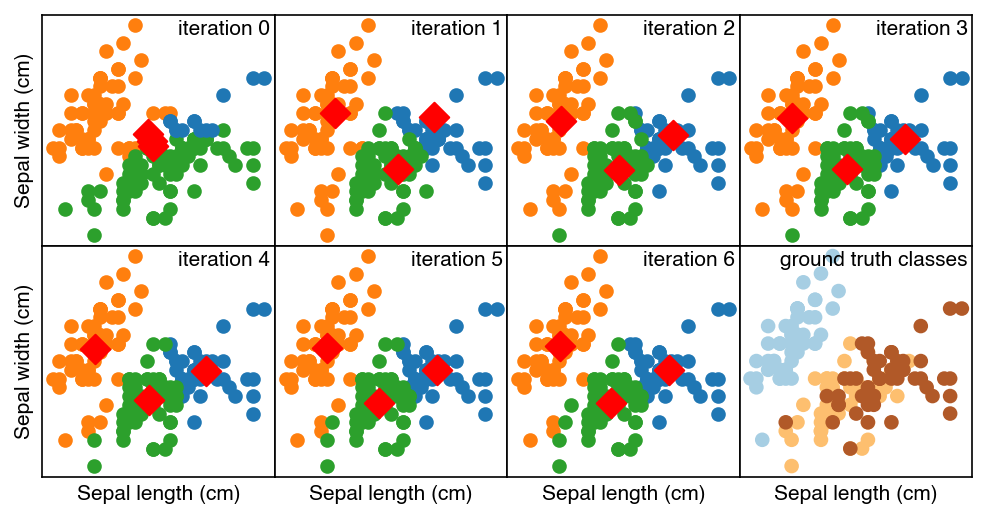

In [9]:
nrow, ncol = 2, 4
fig, axs = plt.subplots(nrow, ncol, figsize=(2*ncol, 2*nrow), gridspec_kw={'hspace': 0, 'wspace': 0})
axs = init_ax_style(axs)
for training_iter in range(7):
    ax = axs[training_iter]
    for k, points in hist[training_iter]['clustered_points'].items():
        points = np.array(points)
        ax.scatter(points[:,0], points[:,1], color=plt.get_cmap('tab10')(k/9))
    cluster_centers_i = hist[training_iter]['cluster_centers']
    ax.scatter(cluster_centers_i[:,0], cluster_centers_i[:,1], marker='D', c='r', s=100)
    axis_text(ax, f'iteration {training_iter}')

axs[-1].scatter(iris.data[:,0], iris.data[:,1], alpha=1, c=iris.target, cmap='Paired')
axis_text(axs[-1], f'ground truth classes')

# Algorithm: K-Means

* __Type__: Unsupervised learning (clustering)
* __Model family__: $k$ centroids
* __Objective function__: Sum of distances to closest centroid
* __Optimizer__: Iterative optimization procedure

# Part 3: Unsupervised Learning in Practice

We will now look at some practical considerations to keep in mind when applying unsupervised learning.

# Review: Generalization

In machine learning, __generalization__ is the property of predictive models to achieve good performance on new, heldout data that is distinct from the training set.

How does generalization apply to unsupervised learning?

# An Unsupervised Learning Dataset

Consider the following dataset, consisting of a mixture of Gaussians.

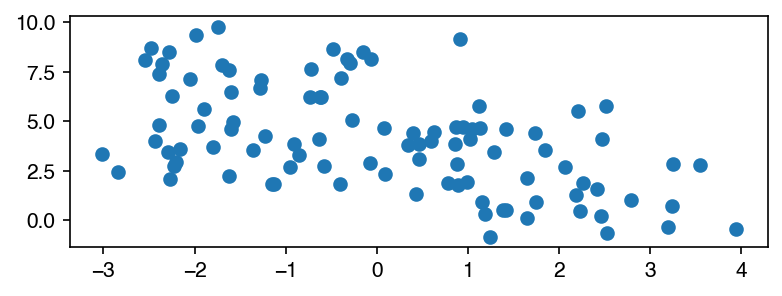

In [10]:
np.random.seed(0)
X, y = datasets.make_blobs(centers=4)
plt.scatter(X[:,0], X[:,1]);

We know the true labels of these clusters, and we can visualize them.

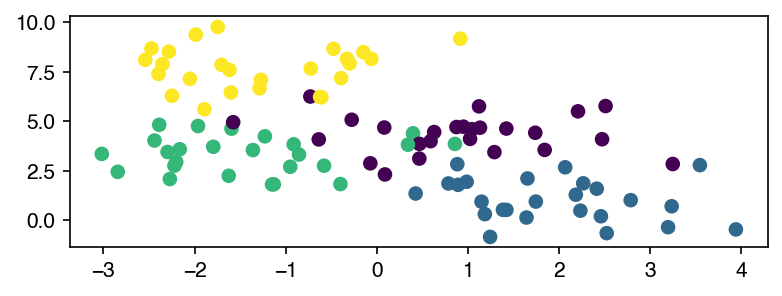

In [11]:
plt.scatter(X[:,0], X[:,1], c=y);

# Underfitting in Unsupervised Learning

Underfitting happens when we are not able to fully learn the signal hidden in the data.

In the context of $K$-Means, this means not capturing all the clusters in the data.

Let's run $K$-Means on our toy dataset.

In [12]:
# fit a K-Means
from sklearn import cluster
model = cluster.KMeans(n_clusters=2, n_init='auto')
model.fit(X);

The centroids find two distinct components in the data, but they fail to capture the true structure.

K-Means Objective: 462.03


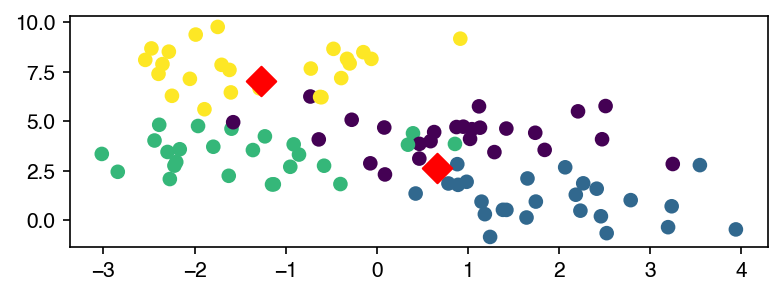

In [13]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

Consider now what happens if we further increase the number of clusters.

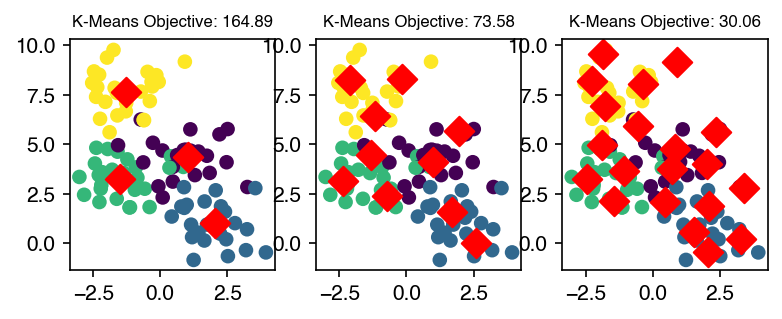

In [14]:
Ks = [4, 10, 20]
f, axes = plt.subplots(1,3)
for k, ax in zip(Ks, axes):
    model = cluster.KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title('K-Means Objective: %.2f' % -model.score(X), fontsize=8)

# Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal.

In our example, this means fitting small, local noise clusters rather than the true global clusters.

K-Means Objective: 5.46


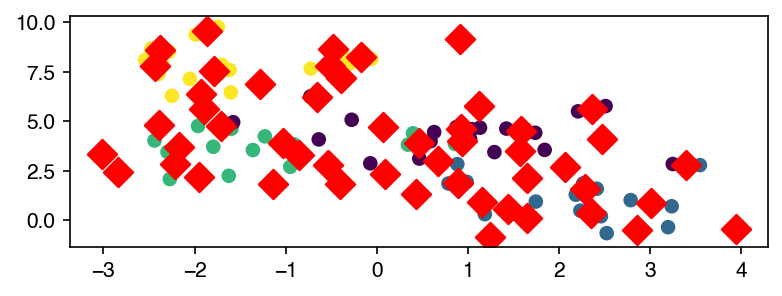

In [15]:
model = cluster.KMeans(n_clusters=50, n_init='auto')
model.fit(X)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
print('K-Means Objective: %.2f' % -model.score(X))

We can see the true structure given enough data.

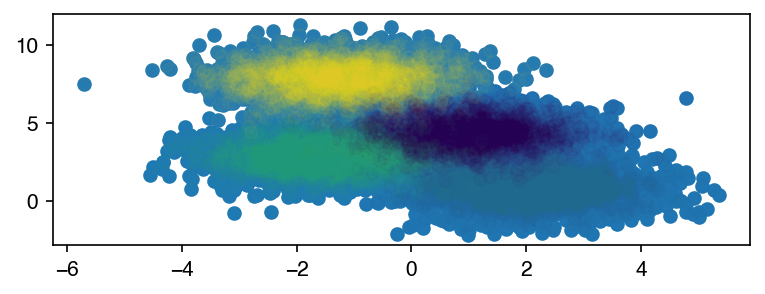

In [16]:
np.random.seed(0)
X, y = datasets.make_blobs(n_samples=10000, centers=4)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.03);

# Data Distribution

We will assume that the dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$x \sim \mathbb{P}.$$

The dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ consists of *independent and identically distributed* (IID) samples from $\mathbb{P}$.

# Data Distribution: IID Sampling

The key assumption in that the training examples are *independent and identically distributed* (IID). 
* Each training example is from the same distribution.
* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

# Generalization in Unsupervised Learning

We can think of the data distribution as being the sum of two distinct components $$\mathbb{P} = F + E$$

1. A signal component $F$ (hidden clusters, speech, low-dimensional data space, etc.)
2. A random noise component $E$

A machine learning model
1. **generalizes** if it fits the true signal $F
2. **overfits** if it learns the noise $E$

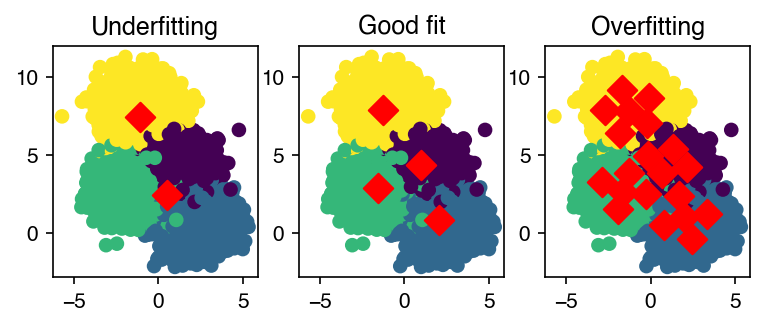

In [17]:
Ks, titles = [2, 4, 20], ['Underfitting', 'Good fit', 'Overfitting']
f, axes = plt.subplots(1,3)
for k, title, ax in zip(Ks, titles, axes):
    model = cluster.KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    ax.scatter(X[:,0], X[:,1], c=y)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', c='r', s=100)
    ax.set_title(title)

# The Elbow Method

The Elbow method is a way of tuning hyper-parameters in unsupervised learning.
* We plot the objective function as a function of the hyper-parameter $K$.
* The "elbow" of the curve happens when its rate of decrease substantially slows down.
* The "elbow' is a good guess for the hyperparameter.

In our example, the decrease in objective values slows down after $K=4$, and after that the curve becomes just a line.

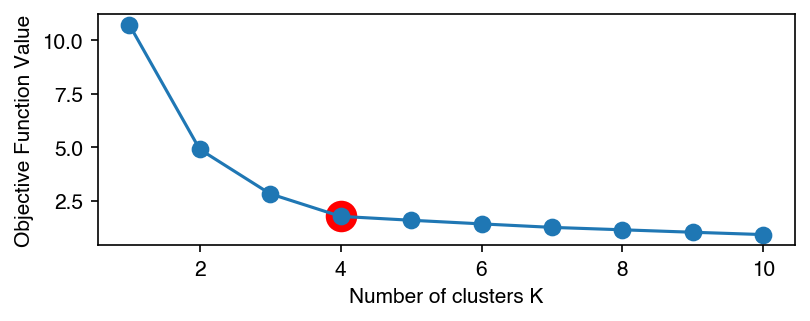

In [18]:
Ks, objs = range(1,11), []
for k in Ks:
    model = cluster.KMeans(n_clusters=k, n_init='auto')
    model.fit(X)
    objs.append(-model.score(X)/X.shape[0])

plt.plot(Ks, objs, '.-', markersize=15)
plt.scatter([4], [objs[3]], s=200, c='r')
plt.xlabel("Number of clusters K")
plt.ylabel("Objective Function Value");

# Detecting Overfitting and Underfitting

In unsupervised learning, overfitting and underfitting are more difficult to quantify than in supervised learning.
* Performance may depend on our intuition and require human evaluation
* If we know the true labels, we can measure the accuracy of the clustering

If our model is probabilistic, we can detect overfitting without labels by comparing the log-likelihood between the training set and a holdout set (next lecture!).

# Reducing Overfitting

There are multiple ways to control for overfitting:
1. Reduce model complexity (e.g., reduce $K$ in $K$-Means)
2. Penalize complexity in objective (e.g., penalize large $K$)
3. Use a probabilistic model and regularize it.

# Summary

Unsupervised learning tries to find interesting information in __unlabeled__ data.
* Examples include clustering, dimensionality reduction, anomaly detection.
* Algorithms have a similar structure (model, objective, optimizer).
* When we fit the noise instead of the data, we overfit.

**Next class:** more clustering with GMMs